In [47]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [48]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequesnces to same length
x_train = pad_sequences(x_train, maxlen=256)
x_test = pad_sequences(x_test, maxlen=256)

In [49]:
#Building the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential([
        Embedding(input_dim=10000,output_dim=16),
        GlobalAveragePooling1D(),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
])


In [50]:
#Compile and train

model.compile(optimizer='adam',                     #Adam = Adaptive Moment Estimation (great default choice, updates the model weight in a smart way based on gradient of the loss function)
              loss='binary_crossentropy',           #Since we are doin the binary classification, it is the right choice. Tells how wrong the model is
              metrics=['accuracy'])                 #Tells Keras to track accuracy

history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2) #returns object containing loss, accuracy

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5374 - loss: 0.6915 - val_accuracy: 0.6802 - val_loss: 0.6818
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6824 - loss: 0.6776 - val_accuracy: 0.7448 - val_loss: 0.6585
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7460 - loss: 0.6500 - val_accuracy: 0.7520 - val_loss: 0.6205
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7709 - loss: 0.6090 - val_accuracy: 0.7868 - val_loss: 0.5692
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8027 - loss: 0.5533 - val_accuracy: 0.8042 - val_loss: 0.5144
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8184 - loss: 0.4973 - val_accuracy: 0.8226 - val_loss: 0.4665
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8430 - loss: 0.4415 - val_accuracy: 0.8328 - val_loss: 0.4284
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8539 - loss: 0.4032 - val_accuracy: 0.8476 - v

In [51]:
#Evaluate

results = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {results}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8596 - loss: 0.3563
Test Accuracy: [0.3586724102497101, 0.8579199910163879]


In [52]:
#Validation Metrics

from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (model.predict(x_test)>0.5).astype("int32")

percision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {percision}, Recall: {recall}, F1 Score: {f1}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.8476841778054087, Recall: 0.87264, F1 Score: 0.8599810785241249


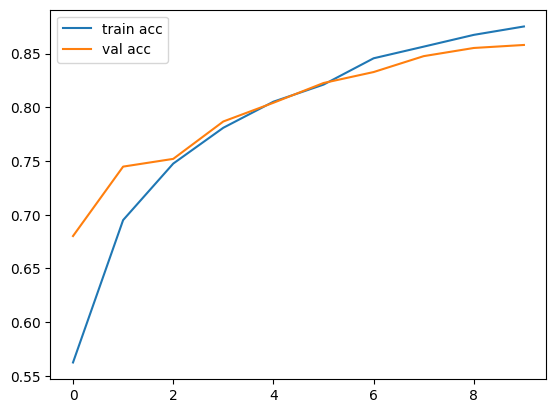

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

In [54]:
#Check custom reviews
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import numpy as np

#Load the word index
word_index = imdb.get_word_index()

#Shift indices by 3 because Keras reserves 0,1,2 for special tokens
word_index = {k: (v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

#Function to encode custom text
def encode_review(text):
    words = text_to_word_sequence(text)
    encoded = [1] # 1 is the "start" token
    for word in words:
        index = word_index.get(word,2) #2 is for unknown words
        encoded.append(index)
    return pad_sequences([encoded], maxlen=256)




In [55]:
#Get user input

user_input = input("Enter your movie review: ")

#Encode and predict
encoded_input = encode_review(user_input)
prediction = model.predict(encoded_input) [0][0] #Extracts the raw prediction value, like 0.87, instead of [[0.87]].

#Display result:
if prediction>0.52:
    print(f'The sentiment is positive with {prediction} accuracy!')
else:
    print(f'The sentiment is negative with {prediction} accuracy!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The sentiment is positive with 0.5924674272537231 accuracy!


Test your own inputs such as:
- The movie was fantastic, I loved it!
- The movie was bad and boring, actors did a bad job and I expected more.

In [56]:
model.save('sentiment_model.h5')